<a href="https://colab.research.google.com/github/noorehira/ProgrammingForAI/blob/main/Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Table of Contents**
*   Importing Libraries
*   Data Understanding
*   Data Preparation
*   Data Imputation

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import seaborn as sns

In [ ]:
#titanic = sns.load_dataset('titanic')
#titanic.to_csv('titanic.csv')

## Data Understanding

*   Dataframe shape
*   Head and Tail
*   Data Types
*   Describe

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
train = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
train.shape

(319795, 18)

In [4]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
train.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [6]:
train.dtypes

,0
HeartDisease,object
BMI,float64
Smoking,object
AlcoholDrinking,object
Stroke,object
PhysicalHealth,float64
MentalHealth,float64
DiffWalking,object
Sex,object
AgeCategory,object


In [7]:
train.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [8]:
train.nunique()

,0
HeartDisease,2
BMI,3604
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


In [9]:
train['Sex'].unique()

array(['Female', 'Male'], dtype=object)

##Feature Understanding

*   Plotting Feature Distributions

  *   Barchart (Categorical Data)
  *   Histogram (Numerical Data)
  *   Boxplot (Numerical Data)

Let's check the frequency of survived and not survived people in the dataset.

<ipython-input-10-cdb1efbdb683>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=train,palette='rainbow')


<Axes: xlabel='HeartDisease', ylabel='count'>

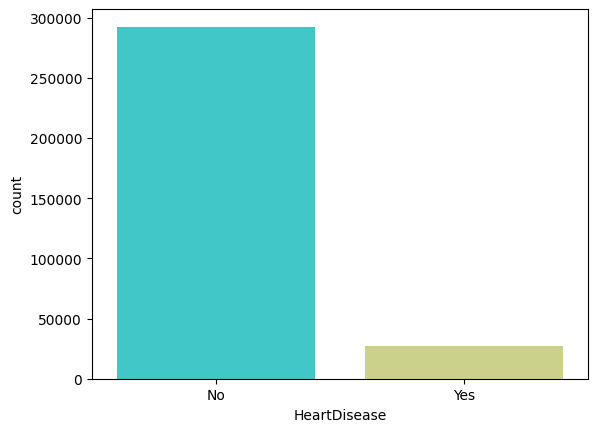

In [10]:
sns.countplot(x='HeartDisease',data=train,palette='rainbow')

<Axes: xlabel='HeartDisease', ylabel='count'>

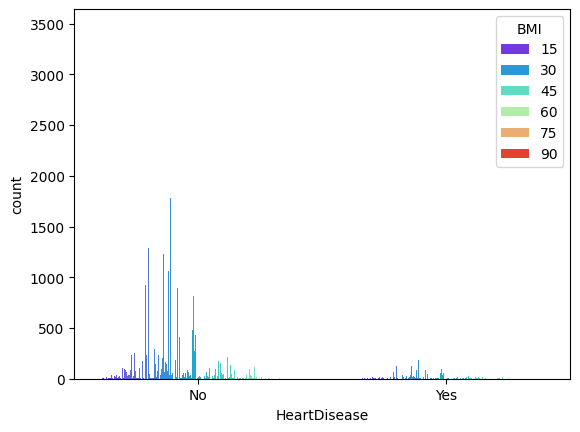

In [11]:
sns.countplot(x='HeartDisease',hue='BMI',data=train,palette='rainbow')

<Axes: xlabel='HeartDisease', ylabel='count'>

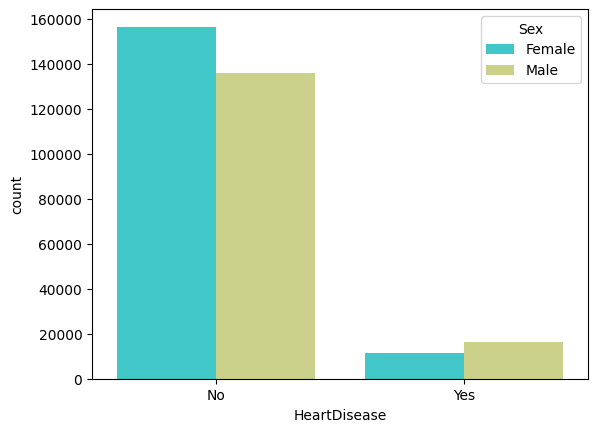

In [12]:
sns.countplot(x='HeartDisease',hue='Sex',data=train,palette='rainbow')

<ipython-input-13-dac9a3a5f372>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AlcoholDrinking',data=train,palette='rainbow')


<Axes: xlabel='AlcoholDrinking', ylabel='count'>

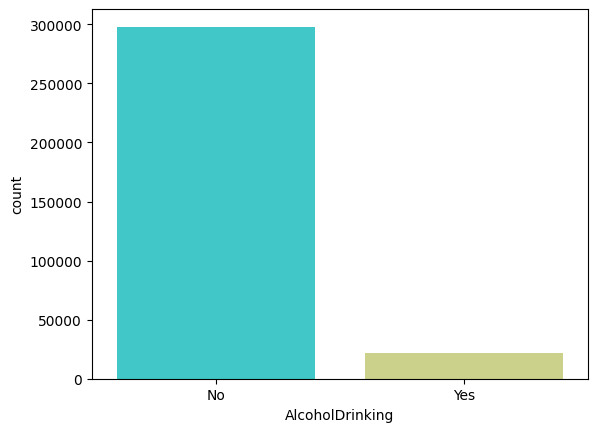

In [13]:
sns.countplot(x='AlcoholDrinking',data=train,palette='rainbow')

<Axes: xlabel='BMI', ylabel='Count'>

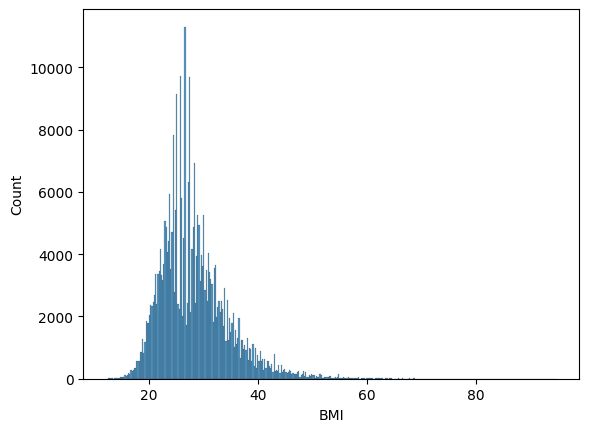

In [15]:
sns.histplot(train['BMI'])

<Axes: >

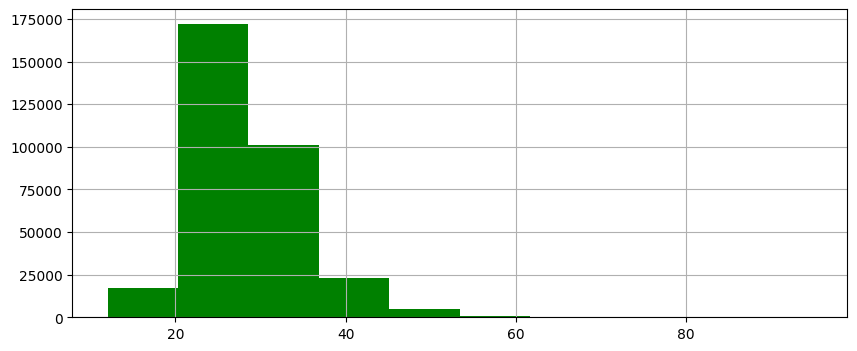

In [17]:
train['BMI'].hist(color='green', figsize=(10,4))

<Axes: xlabel='MentalHealth', ylabel='Count'>

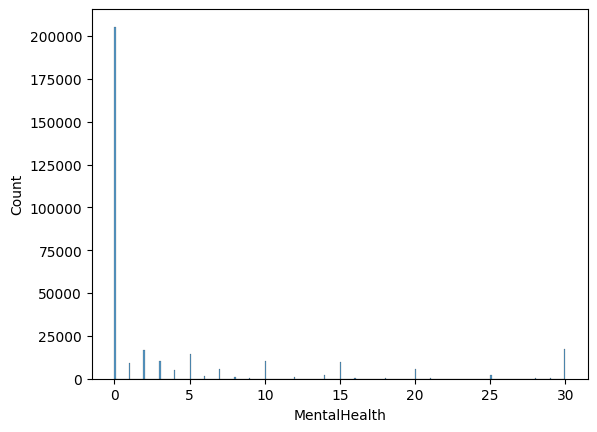

In [18]:
sns.histplot(train['MentalHealth'])

<Axes: xlabel='MentalHealth', ylabel='PhysicalActivity'>

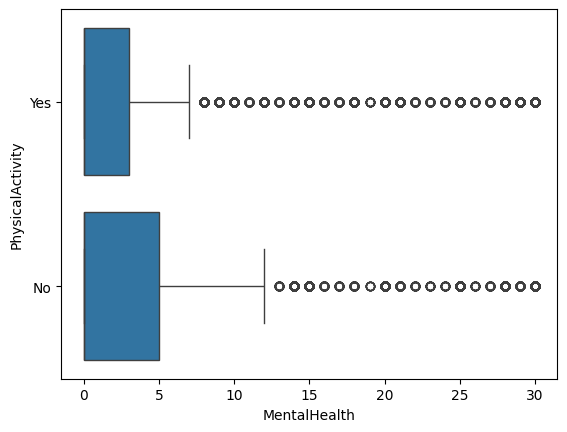

In [19]:
sns.boxplot(y='PhysicalActivity', x='MentalHealth', data=train)

<Axes: ylabel='Diabetic'>

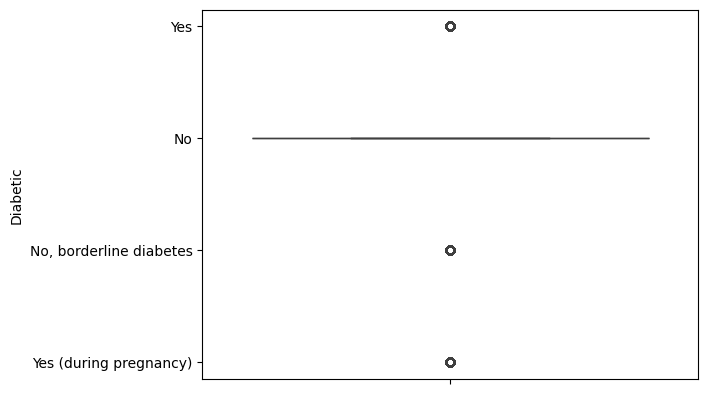

In [21]:
sns.boxplot(y='Diabetic', data=train)

# **Outlier Removal**

In [ ]:
#train=train[train['Age'] < 66]

In [ ]:
#sns.boxplot(y='Age', data=train)

##Data Preparation

*   Dropping irrelevant columns and rows
*   Handling Missing Values
*   Identifying duplicated columns
*   Renaming Columns


Let's begin some exploratory data analysis! We'll start by dropping irrelevant columns

In [22]:
train.drop(['SkinCancer','KidneyDisease','Asthma'],axis=1,inplace=True)

In [23]:
train.shape

(319795, 15)

In [24]:
train.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime'],
      dtype='object')

In [25]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0


## Data Imputation
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:

In [26]:
train.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [27]:
train.isnull()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319791,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319792,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
319793,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

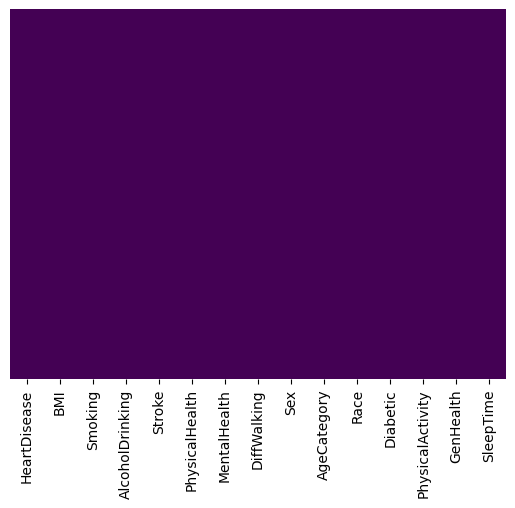

In [28]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# #sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')
# mean_values = train.groupby('Pclass')['Age'].mean()
# print(mean_values)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
# def impute_age(cols):
#     Age = cols[0]
#     Pclass = cols[1]

#     if pd.isnull(Age):

#         if Pclass == 1:
#             return 37

#         elif Pclass == 2:
#             return 29

#         else:
#             return 24

#     else:
#         return Age

Now apply that function!

In [ ]:
# train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-349-b8fc05cf2ef4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age = cols[0]
<ipython-input-349-b8fc05cf2ef4>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass = cols[1]


Now let's check that heat map again!

<Axes: >

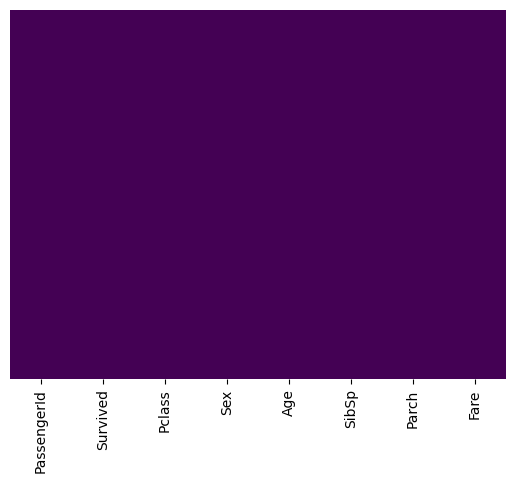

In [ ]:
# sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Identifying Duplicated Columns**

##Converting Categorical Features

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
dtypes: float64(4), object(11)
memory usage: 36.6+ MB


In [36]:
sex = pd.get_dummies(train['Smoking'],dtype=int)

In [37]:
train.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0


In [42]:
train = pd.concat([train,sex],axis=1)

In [43]:
train.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,No,Yes
0,No,16.60,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,0,1
1,No,20.34,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,1,0
2,No,26.58,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,0,1
3,No,24.21,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,1,0
4,No,23.71,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,1,0


In [44]:
train.drop(['Sex'],axis=1,inplace=True)

In [45]:
train.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,No,Yes
0,No,16.60,No,No,3.0,30.0,No,55-59,White,Yes,Yes,Very good,5.0,0,1
1,No,20.34,No,Yes,0.0,0.0,No,80 or older,White,No,Yes,Very good,7.0,1,0
2,No,26.58,No,No,20.0,30.0,No,65-69,White,Yes,Yes,Fair,8.0,0,1
3,No,24.21,No,No,0.0,0.0,No,75-79,White,No,No,Good,6.0,1,0
4,No,23.71,No,No,28.0,0.0,Yes,40-44,White,No,Yes,Very good,8.0,1,0


In [46]:
train = train.rename(columns={'male':'Male'})

In [47]:
train.head()

,HeartDisease,BMI,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,No,Yes
0,No,16.60,No,No,3.0,30.0,No,55-59,White,Yes,Yes,Very good,5.0,0,1
1,No,20.34,No,Yes,0.0,0.0,No,80 or older,White,No,Yes,Very good,7.0,1,0
2,No,26.58,No,No,20.0,30.0,No,65-69,White,Yes,Yes,Fair,8.0,0,1
3,No,24.21,No,No,0.0,0.0,No,75-79,White,No,No,Good,6.0,1,0
4,No,23.71,No,No,28.0,0.0,Yes,40-44,White,No,Yes,Very good,8.0,1,0


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   AlcoholDrinking   319795 non-null  object 
 3   Stroke            319795 non-null  object 
 4   PhysicalHealth    319795 non-null  float64
 5   MentalHealth      319795 non-null  float64
 6   DiffWalking       319795 non-null  object 
 7   AgeCategory       319795 non-null  object 
 8   Race              319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  No                319795 non-null  int64  
 14  Yes               319795 non-null  int64  
dtypes: float64(4), int64(2), object(9)
memory usage: 36.6+ MB


# Lab Task

Perform the steps mentioned above on the following datasete

https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease